In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# for display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  #default 'last_expr'

## **Hightlights**: 
<a href='#31'> Filling Missing Values with Group-Specific Values </a>

# <a id='0'>Group Operation and Data Aggregation
   
Group a dataset using key values, then use an aggregate function to obtain group statistics or use an apply function for an element-wise tranformation. <br>

- <a href='#1'> GroupBy Mechanics
- <a href='#2'> Data Aggregation
- <a href='#3'> Apply
    - <a href='#31'> Example: Filling Missing Values with Group-Specific Values
    - <a href='#33'> Example: Group Weighted Average and Correlation
- <a href='#4'> Cross-Tabulation and Pivot Tables

## <a id='1'> GroupBy Mechanics
- <a href='#0'> Back to TOC

Generate a list of values matching the length of the target column for grouping <br>
- internal columns of the DF (**most common**)
- external arrays
- Dict or Series
- Functions


In [ ]:
#### Q. How to access the sub_df in a grb object via the group key?

# access the first sub_df in the list
list(grb)[0]  # return a tuple: (key, df_key)

# access via key
dict(list(grb))[key_value]

In [3]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.166485,-0.821999
1,a,two,-0.567600,-0.347744
2,b,one,-0.767750,-0.431110
3,b,two,-1.055191,-0.708813
4,a,one,-1.082732,1.931212


### Grouping with internal column(s)

In [4]:
# Aggfunc: mean, size

# group df using key1
df.groupby('key1').mean()                     # return a df, excluding categorical col 'key2'

# group data1 using key1 and key2
df.groupby(['key1', 'key2']).mean()

# group by key1 & key2, count the occurencies
df.groupby(['key1', 'key2']).size()   # return se

,data1,data2
key1,,
a,-0.938939,0.253823
b,-0.911470,-0.569962


data1     data2
key1 key2                    
a    one  -1.124609  0.554607
     two  -0.567600 -0.347744
b    one  -0.767750 -0.431110
     two  -1.055191 -0.708813

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Grouping with Arrays

In [5]:
# group using 
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years  = np.array([2005,           2005,         2006,   2005,  2006])
df.groupby([states, years]).mean()

data1     data2
California 2005 -0.567600 -0.347744
           2006 -0.767750 -0.431110
Ohio       2005 -1.110838 -0.765406
           2006 -1.082732  1.931212

### Accessing Groups

In [7]:
grb = df.groupby('key1')

# loop over
for key, group_df in grb:
    print(key)
    print(group_df)

# access through a key value
pieces = dict(list(grb))
pieces['b']

a
  key1 key2     data1     data2
0    a  one -1.166485 -0.821999
1    a  two -0.567600 -0.347744
4    a  one -1.082732  1.931212
b
  key1 key2     data1     data2
2    b  one -0.767750 -0.431110
3    b  two -1.055191 -0.708813


,key1,key2,data1,data2
2,b,one,-0.767750,-0.431110
3,b,two,-1.055191,-0.708813


#### Selecting a Column or Subset of Columns

In [14]:
df.groupby('key1')[['data1','data2']].mean()      # slower
df[['data1','data2']].groupby(df['key1']).mean()  # faster, but need to use df['key1'] in groupby()

,data1,data2
key1,,
a,-0.938939,0.253823
b,-0.911470,-0.569962


,data1,data2
key1,,
a,-0.938939,0.253823
b,-0.911470,-0.569962


### Grouping with Functions

Functions acts on the index of the chosen axis, returned values are used as group names. Simply a convenience function for grouping with arrays.

## <a id='2'> Data Aggregation 
Return a single value after the group operation.
- <a href='#0'> Back to TOC    

In [17]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.008514,-0.345937
1,a,two,0.564825,-0.715947
2,b,one,0.321963,0.337398
3,b,two,0.828203,-0.377407
4,a,one,0.737914,-1.034705


#### Built-in functions

In [20]:
# not strictly an agg function, but conveniently return group stats
grb['data1', 'data2'].describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.938939  0.324304 -1.166485 -1.124609 -1.082732 -0.825166   
b      2.0 -0.911470  0.203251 -1.055191 -0.983331 -0.911470 -0.839610   

              data2                                                    \
          max count      mean       std       min       25%       50%   
key1                                                                    
a    -0.56760   3.0  0.253823  1.471888 -0.821999 -0.584871 -0.347744   
b    -0.76775   2.0 -0.569962  0.196366 -0.708813 -0.639387 -0.569962   

                          
           75%       max  
key1                      
a     0.791734  1.931212  
b    -0.500536 -0.431110

#### Use agg( ) to call one external function

In [21]:
# The agg function takes an array as input
def peak_to_peak(arr):
    return arr.max() - arr.min()

df.groupby('key1').agg(peak_to_peak)

,data1,data2
key1,,
a,0.746428,0.688768
b,0.506241,0.714805


#### Use agg( ) with Multiple Functions ( powerful ! )

In [23]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head(3)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587


In [24]:
grb_pct = tips.groupby('day')['tip_pct']
grb_pct.agg(['count', 'mean', peak_to_peak])

,count,mean,peak_to_peak
day,,,
Fri,19,0.169913,0.159925
Sat,87,0.153152,0.290095
Sun,76,0.166897,0.650898
Thur,62,0.161276,0.193350


## <a id='3'> Apply
apply( ): enhanced aggregation with arguments
    
- <a href='#0'> Back to TOC

#### Return the two largest bills of the day

In [34]:
def top(df, n=5, column='total_bill'):
        return df.sort_values(by=column)[-n:]

tips.groupby('day')['total_bill','smoker'].apply(top, n=2, column='total_bill')

total_bill smoker
day                        
Fri  90        28.97    Yes
     95        40.17    Yes
Sat  212       48.33     No
     170       50.81    Yes
Sun  182       45.35    Yes
     156       48.17     No
Thur 142       41.19     No
     197       43.11    Yes

### Quantile (Bucket) Analysis
Transform a numerical column into a quantile categorical, use it to group another numeric column and obtain stats.

In [36]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame.head(3)

,data1,data2
0,-0.734223,-0.304139
1,1.735161,0.394634
2,1.260597,0.939429


In [25]:
# pd.qcut: separate arrays by counts of samples
# pd.cut : separate arrays by values of samples

def get_stats(se):
    return {'1-min'  : se.min(),    '2-max': se.max(),
            '3-count': se.count(), '4-mean': se.mean(),
            '5-skew' : se.skew(),  '6-kurt': se.kurtosis()
           }

quartile_bins = pd.cut(frame.data1, 4) # return a Series obj

gby = frame['data2'].groupby(quartile_bins)
gby.apply(get_stats).unstack()
gby.describe() # for comparison

,1-min,2-max,3-count,4-mean,5-skew,6-kurt
data1,,,,,,
"(-3.434, -1.908]",-2.079446,1.388465,27.0,-0.114604,-0.247906,-0.375997
"(-1.908, -0.387]",-2.909373,2.531127,321.0,-0.049123,0.053099,-0.176443
"(-0.387, 1.133]",-3.548824,3.366626,515.0,0.028136,-0.198449,0.332967
"(1.133, 2.654]",-2.091554,2.615416,137.0,0.050270,0.065142,-0.259846


,count,mean,std,min,25%,50%,75%,max
data1,,,,,,,,
"(-3.434, -1.908]",27.0,-0.114604,0.912507,-2.079446,-0.553435,-0.049986,0.359982,1.388465
"(-1.908, -0.387]",321.0,-0.049123,1.046589,-2.909373,-0.792135,-0.145156,0.706805,2.531127
"(-0.387, 1.133]",515.0,0.028136,0.974461,-3.548824,-0.545786,0.053447,0.683745,3.366626
"(1.133, 2.654]",137.0,0.050270,0.952484,-2.091554,-0.573684,0.011194,0.772942,2.615416


### <a id='31'> Example: Filling Missing Values with Group-Specific Values
- <a href='#0'> Back to TOC <br>

### Why fill in NAs using group-specific means ?
#### Example: the Tips dataset, larger average bill on weekends in the restaurant

In [72]:
tips = pd.read_csv('examples/tips.csv')
tips.head(3)
print("Mean total bill: {:.1f}".format(tips['total_bill'].mean()))
print("Mean total bill on a different day:")
np.round(tips['total_bill'].groupby(tips['day']).mean(),1)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


Mean total bill: 19.8
Mean total bill on a different day:


day
Fri     17.2
Sat     20.4
Sun     21.4
Thur    17.7
Name: total_bill, dtype: float64

#### Generate some NAs in total_bill for each weekday

In [74]:
na_idx = tips['day'].drop_duplicates().index  # cool trick !
tips.loc[na_idx, 'total_bill'] = np.nan
print('Generated NA for each weekday:')
tips.iloc[na_idx][['total_bill','day']]

Generated NA for each weekday:


,total_bill,day
0,NaN,Sun
19,NaN,Sat
77,NaN,Thur
90,NaN,Fri


#### Fill in NAs using day-specific mean value will be more accurate

In [76]:
# fill in NAs with group means
fillna_grp_mean = lambda s: s.fillna(s.mean()) # cool trick !
bill_fillna_grp_mean = np.round(tips.groupby('day')['total_bill'].apply(fillna_grp_mean),1)

# Let's compare it to filling in NA with a more generic overall mean
bill_fillna_mean = np.round(tips['total_bill'].fillna(tips['total_bill'].mean()),1)

# Display the difference !
pd.concat([bill_fillna_grp_mean.rename('bill_fillna_group_mean'), 
           bill_fillna_mean.rename('bill_fillna_mean'), 
           tips['day'].rename('day')], axis=1).iloc[na_idx]

,bill_fillna_group_mean,bill_fillna_mean,day
0,21.5,19.7,Sun
19,20.4,19.7,Sat
77,17.5,19.7,Thur
90,16.5,19.7,Fri


### <a id='33'> Example: Group Weighted Average and Correlation
- <a href='#0'> Back to TOC

In [77]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df.head(3)

,category,data,weights
0,a,-0.953627,0.703843
1,a,0.012984,0.759797
2,a,-1.904929,0.026330


In [25]:
grb = df.groupby('category')
get_w_avg = lambda g: np.average(g['data'], weights=g['weights'])
grb.apply(get_w_avg)

category
a   -0.245188
b    0.352824
dtype: float64

#### Yearly correlation b/t Stock Prices

In [78]:
!head -n4 examples/stock_px_2.csv

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.4,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01


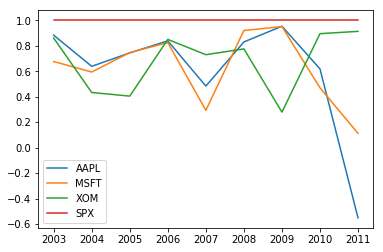

In [79]:
close_px = pd.read_csv('examples/stock_px_2.csv', 
                       index_col=0,
                       parse_dates=True,  # parse the index as a datetime obj
                      )
close_px.head(3)

# Overall corr
close_px.corrwith(close_px['SPX'])

# Yearly corr
gby  = close_px.groupby(lambda idx: idx.year) # group by function/dict/series acts on index/col-label
yearly_corr = gby.apply(lambda x: x.corrwith(x['SPX']))
yearly_corr
yearly_corr.plot(); # combo: groupby -> apply -> plot

## <a id='4'> Cross-Tabulations and Pivot Tables
For two categorical variables.
    
- <a href='#0'> Back to TOC

In [80]:
# Load tips data
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head(3)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587


### Pivot tables

#### How do weekday and time of the day affect how much people tip?

In [95]:
np.round(pd.pivot_table(tips, values='tip_pct', index='day', columns='time'),2) # mean() as the default calculation

# It's good to have counts by the side to ensure good statistics
np.round(pd.pivot_table(tips, values='tip_pct', index='day', columns='time', aggfunc=['mean','count']),2)

time,Dinner,Lunch
day,,
Fri,0.16,0.19
Sat,0.15,NaN
Sun,0.17,NaN
Thur,0.16,0.16


mean        count      
time Dinner Lunch Dinner Lunch
day                           
Fri    0.16  0.19   12.0   7.0
Sat    0.15   NaN   87.0   NaN
Sun    0.17   NaN   76.0   NaN
Thur   0.16  0.16    1.0  61.0

### Cross-Tabulations: Crosstab

#### What is the busiest time of the week in the restaurant?

In [96]:
pd.crosstab(tips.day, tips.time, margins=False)

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61
